In [1]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is 6633-7B82

 Directory of C:\Users\nesto\Desktop

08/15/2023  01:28 PM    <DIR>          .
08/14/2023  03:29 PM    <DIR>          ..
08/15/2023  01:28 PM    <DIR>          .ipynb_checkpoints
08/12/2023  04:22 PM             2,136 2016_travelers.csv
08/12/2023  04:22 PM             2,148 2017_travelers.csv
08/12/2023  04:22 PM             2,310 2018_travelers.csv
08/11/2023  04:37 PM               978 avg_rain_state.csv
08/14/2023  03:28 PM        61,976,431 Conditions_Contributing_to_COVID-19_Deaths.csv
08/14/2023  02:53 PM       104,323,749 Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv
08/11/2023  02:18 PM           292,474 Introduction to matplot 1.ipynb
08/12/2023  12:58 PM            18,131 mpg.csv
08/11/2023  04:48 PM    <DIR>          Older Files
08/12/2023  06:12 PM           195,400 Plotting with Pandas Jul24 THREE.ipynb
08/12/2023  01:52 PM            37,377 Plotting With Pandas 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conditions_covid = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths.csv")

C:\Users\nesto\AppData\Local\Temp\ipykernel_36612\3949284954.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  conditions_covid = pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths.csv")


In [4]:
conditions_covid.head(2)

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,1/1/2020,7/22/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,0-24,"1,561","1,637"
1,1/1/2020,7/22/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,25-34,"5,782","6,005"


In [6]:
conditions_covid["Condition"].unique()

array(['Influenza and pneumonia', 'Chronic lower respiratory diseases',
       'Adult respiratory distress syndrome', 'Respiratory failure',
       'Respiratory arrest', 'Other diseases of the respiratory system',
       'Hypertensive diseases', 'Ischemic heart disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure',
       'Cerebrovascular diseases',
       'Other diseases of the circulatory system', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)', 'COVID-19'],
      dtype=object)

In [8]:
conditions_covid.columns[0:]

Index(['Start Date', 'End Date', 'Group', 'Year', 'Month', 'State',
       'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions'],
      dtype='object')

In [9]:
conditions_covid["COVID-19 Deaths"].unique()

array(['1,561', '5,782', '15,040', ..., 124.0, 171.0, 164.0], dtype=object)

In [10]:
conditions_covid["COVID-19 Deaths"] = conditions_covid["COVID-19 Deaths"].str.replace(",","")

In [12]:
conditions_covid.dropna(inplace = True) #this drops NA values

In [13]:
conditions_covid["Age Group"].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+', 'Not stated', 'All Ages'], dtype=object)

In [14]:
conditions_covid.groupby("Condition")["COVID-19 Deaths"].sum()

Condition
Adult respiratory distress syndrome                                          0032313614142592317206656135557303029371954221...
All other conditions and causes (residual)                                   0054337326138222745729558424151175117420112087...
Alzheimer disease                                                            0000000000000000000000000000000000000000000000...
COVID-19                                                                     0019936761123864744781411691006477904010235743...
Cardiac arrest                                                               0041513411133781215988861343533426195619868567...
Cardiac arrhythmia                                                           0003105301416220100685521756301531121000010000...
Cerebrovascular diseases                                                     0002102122547211214793768712353510321020110000...
Chronic lower respiratory diseases                                           002735116021678132341415

In [15]:
conditions_covid.groupby("Age Group")["COVID-19 Deaths"].sum()

Age Group
0-24          0092719173832139226363422429291438153195123849...
25-34         0045188987515010870481252053301481071191096713...
35-44         0189479246180416291168184320632852415266306292...
45-54         0223214117635089628934975099782112257014037868...
55-64         0445935351941110221432189126413492654541570663...
65-74         1070159583324164533153501215825925438105791302...
75-84         1187475133824181835703793239331597038134271524...
85+           0081983904540175931733209213429556591125351316...
All Ages      2832292750114756710413767140168697108052316844...
Not stated    0010100000220011000110011000000000000000000000...
Name: COVID-19 Deaths, dtype: object

In [16]:
conditions_covid["Age Group"].value_counts()

Not stated    52676
0-24          46323
25-34         42024
All Ages      38186
35-44         36976
45-54         32420
85+           30213
55-64         29850
75-84         29676
65-74         29175
Name: Age Group, dtype: int64

In [19]:
conditions_covid["COVID-19 Deaths"].isnull().sum()

0

In [20]:
conditions_covid["COVID-19 Deaths"] = conditions_covid["COVID-19 Deaths"].astype(int) #this changes the values to integer

In [21]:
jjj = conditions_covid.groupby(["Condition", "Age Group"])["COVID-19 Deaths"].sum().reset_index()
# mean()
# min()
# max()
# median()

In [28]:
jjj2 = jjj[jjj["Age Group"] == "All Ages"] #Wow, this groups the All Ages rows within the Age Group Column. Awesome

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
jjj2

,Condition,Age Group,COVID-19 Deaths
8,Adult respiratory distress syndrome,All Ages,209847
18,All other conditions and causes (residual),All Ages,945906
28,Alzheimer disease,All Ages,65941
38,COVID-19,All Ages,2275679
48,Cardiac arrest,All Ages,266310
58,Cardiac arrhythmia,All Ages,182204
68,Cerebrovascular diseases,All Ages,118298
78,Chronic lower respiratory diseases,All Ages,214887
88,Diabetes,All Ages,333397
98,Heart failure,All Ages,190624


In [33]:
len(jjj2)

23

In [35]:
jjj2.shape

(23, 3)

In [36]:
jjj.columns

Index(['Condition', 'Age Group', 'COVID-19 Deaths'], dtype='object')

In [42]:
jjj2.set_index("Condition", inplace = True)

# the following code is to undo the indexing of the Condition column: jjj2.reset_index(inplace=True)

#jjj2.reset_index(inplace=True)

In [43]:
jjj2.columns

Index(['Age Group', 'COVID-19 Deaths'], dtype='object')

In [46]:
jjj2.index

Index(['Adult respiratory distress syndrome',
       'All other conditions and causes (residual)', 'Alzheimer disease',
       'COVID-19', 'Cardiac arrest', 'Cardiac arrhythmia',
       'Cerebrovascular diseases', 'Chronic lower respiratory diseases',
       'Diabetes', 'Heart failure', 'Hypertensive diseases',
       'Influenza and pneumonia',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'Ischemic heart disease', 'Malignant neoplasms', 'Obesity',
       'Other diseases of the circulatory system',
       'Other diseases of the respiratory system', 'Renal failure',
       'Respiratory arrest', 'Respiratory failure', 'Sepsis',
       'Vascular and unspecified dementia'],
      dtype='object', name='Condition')

In [47]:
jjj2

,Age Group,COVID-19 Deaths
Condition,,
Adult respiratory distress syndrome,All Ages,209847
All other conditions and causes (residual),All Ages,945906
Alzheimer disease,All Ages,65941
COVID-19,All Ages,2275679
Cardiac arrest,All Ages,266310
Cardiac arrhythmia,All Ages,182204
Cerebrovascular diseases,All Ages,118298
Chronic lower respiratory diseases,All Ages,214887
Diabetes,All Ages,333397


In [48]:
jjj2.drop("Age Group", axis=1, inplace=True)

C:\Users\nesto\AppData\Local\Temp\ipykernel_36612\3892913325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jjj2.drop("Age Group", axis=1, inplace=True)


In [49]:
jjj2

,COVID-19 Deaths
Condition,
Adult respiratory distress syndrome,209847
All other conditions and causes (residual),945906
Alzheimer disease,65941
COVID-19,2275679
Cardiac arrest,266310
Cardiac arrhythmia,182204
Cerebrovascular diseases,118298
Chronic lower respiratory diseases,214887
Diabetes,333397


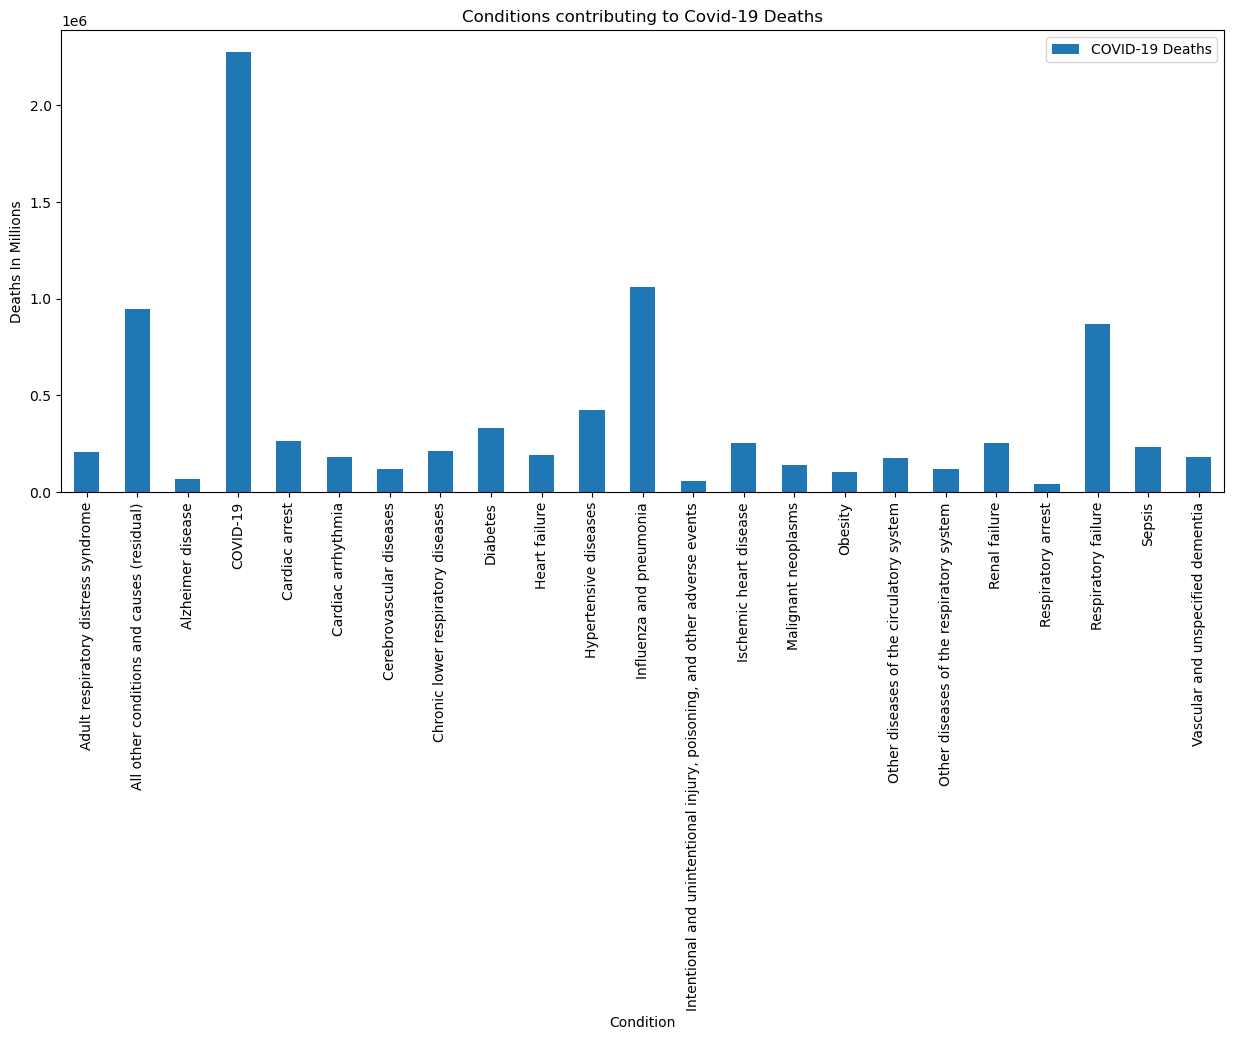

In [51]:
jjj2.plot(kind = "bar", figsize = (15, 6), title = "Conditions contributing to Covid-19 Deaths")
plt.ylabel("Deaths In Millions")
plt.show()

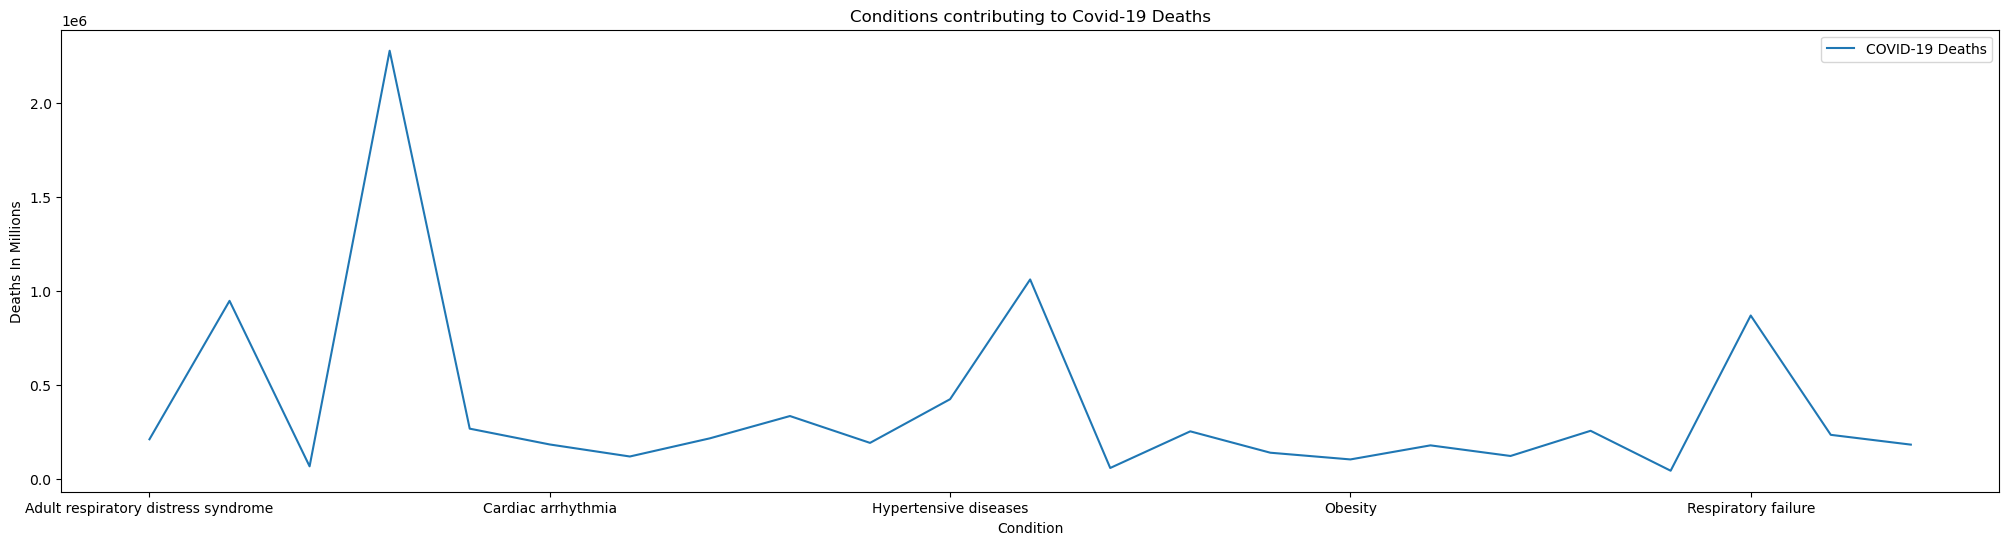

In [53]:
jjj2.plot(kind = "line", figsize = (25, 6), title = "Conditions contributing to Covid-19 Deaths")
plt.ylabel("Deaths In Millions")
plt.show()

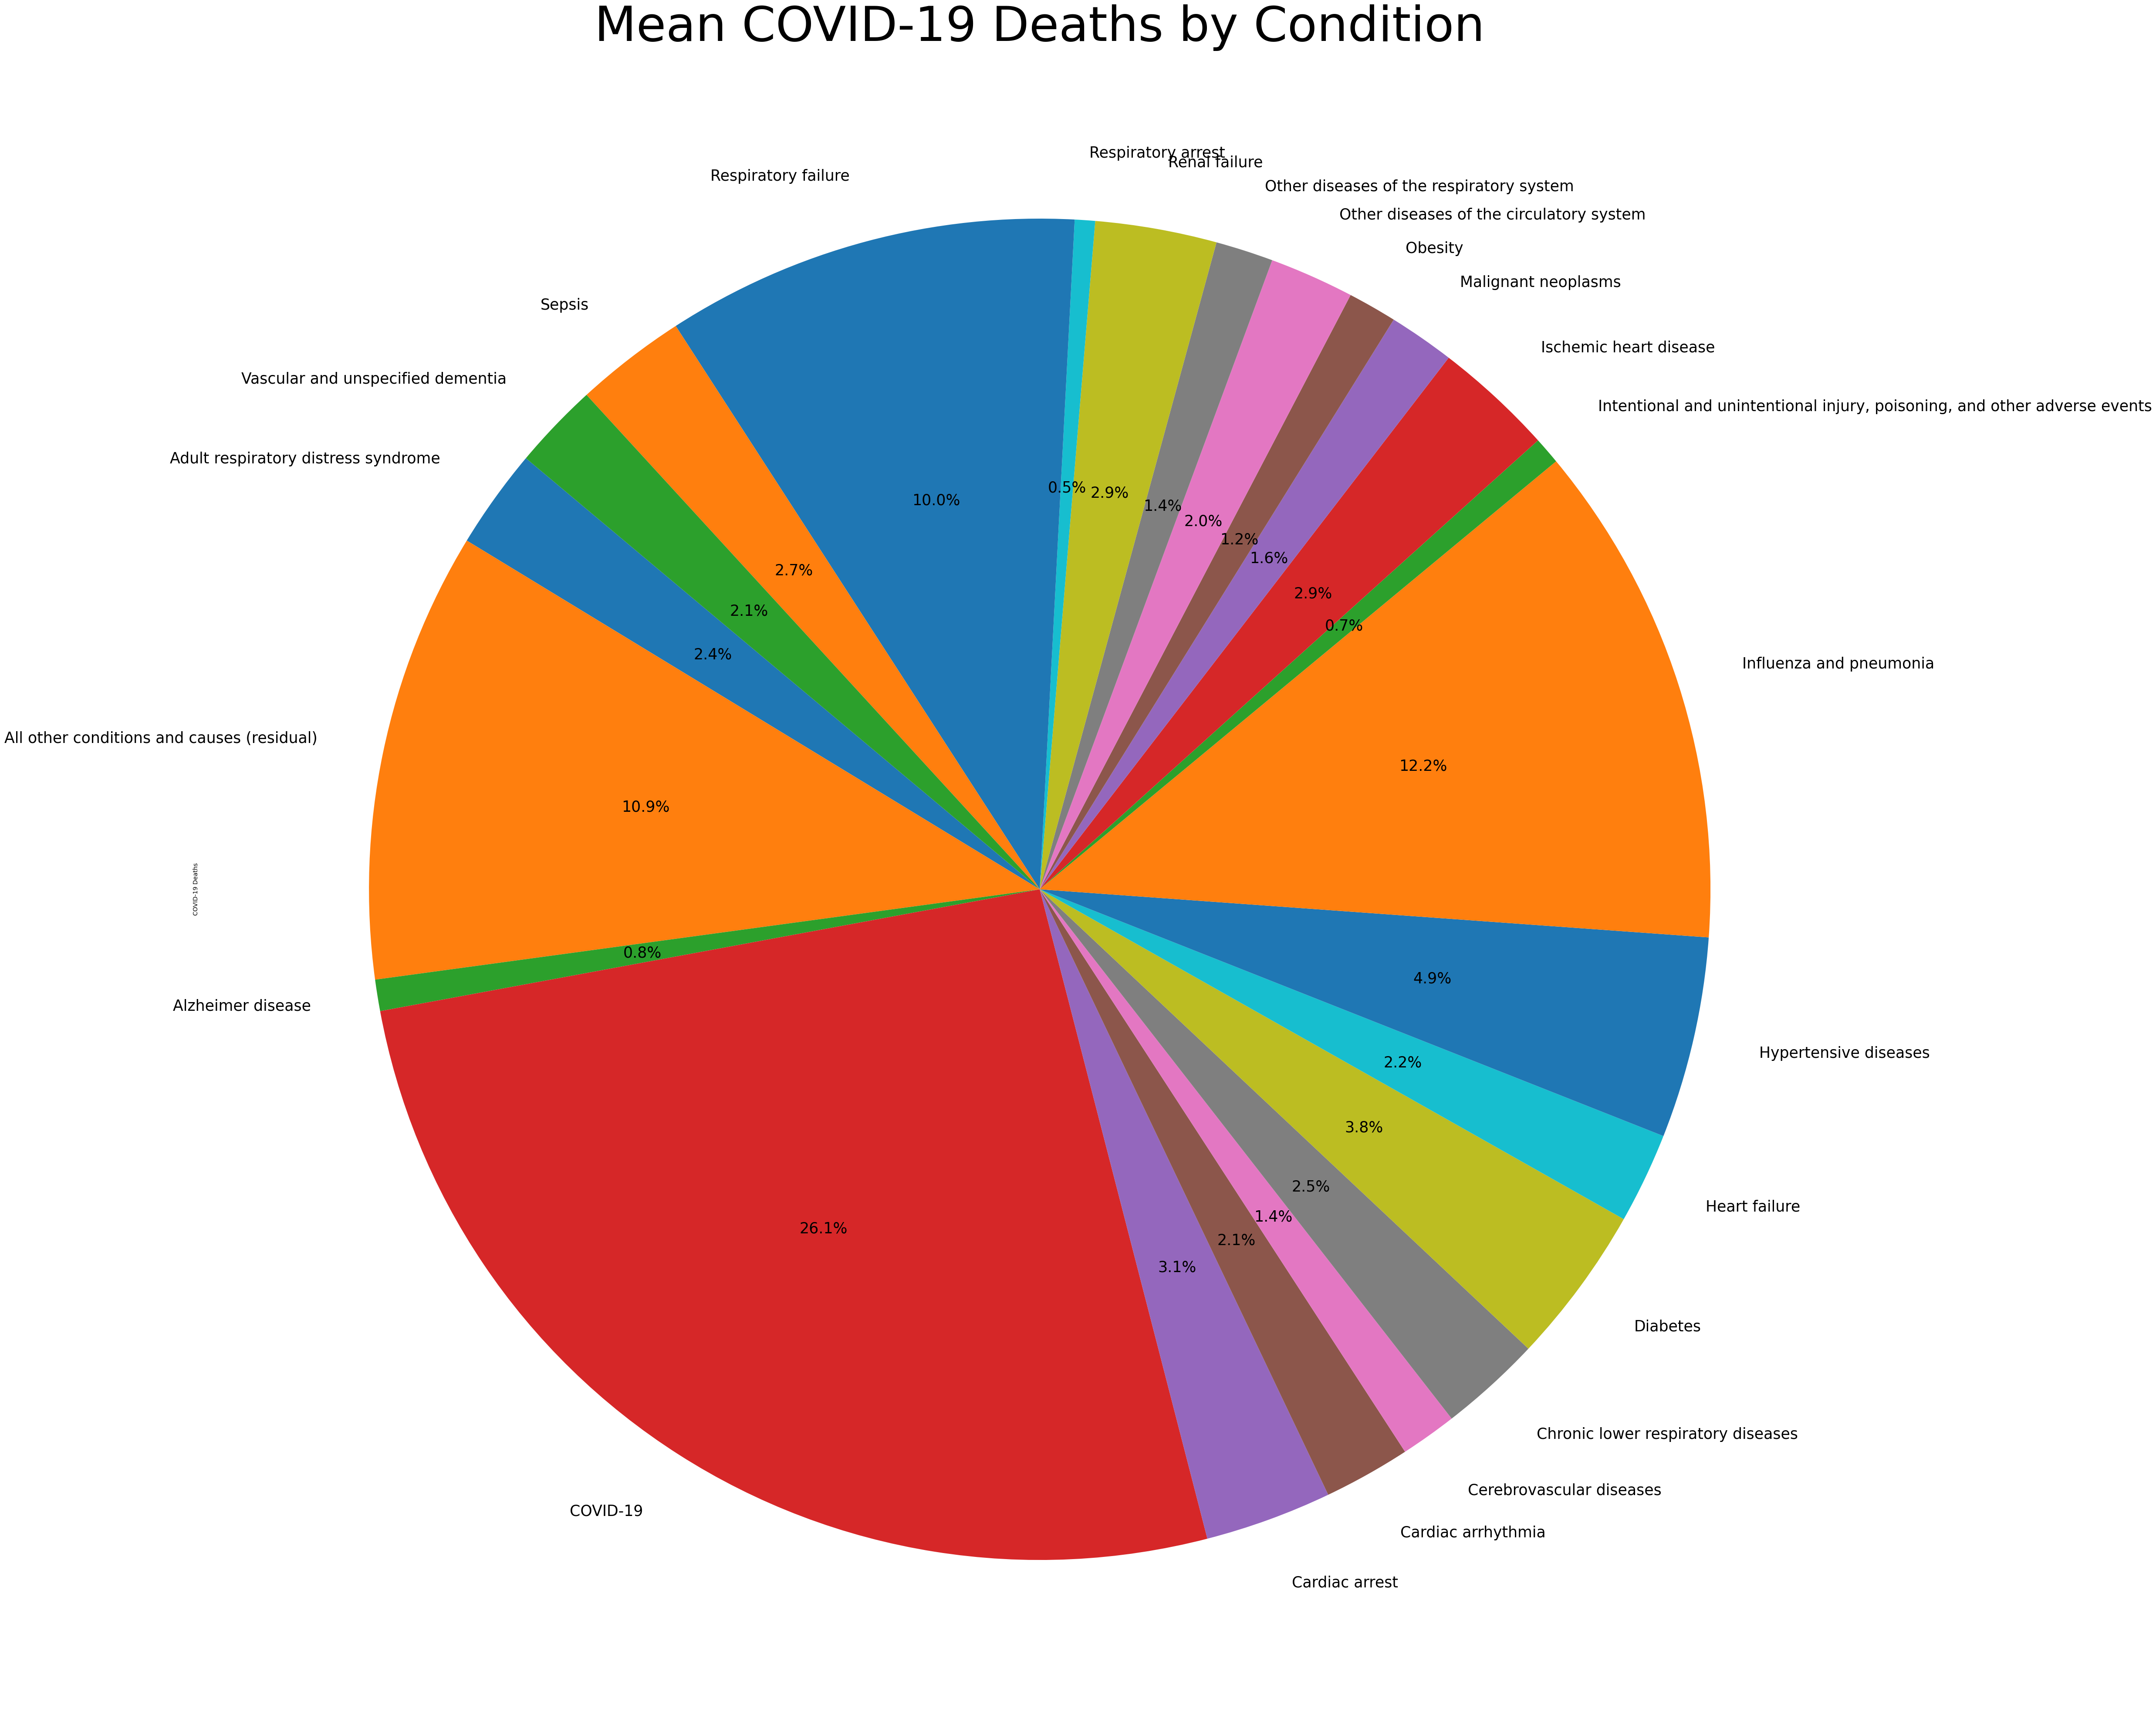

In [55]:
plt.figure(figsize=(50, 50))
jjj2.groupby("Condition")["COVID-19 Deaths"].mean().plot(kind = "pie",autopct="%1.1f%%", startangle=140, textprops={"fontsize":25})
plt.title("Mean COVID-19 Deaths by Condition", fontsize=80)
plt.show()

In [62]:
top_10 = jjj2.nlargest(10, "COVID-19 Deaths")

In [63]:
top_10

,COVID-19 Deaths
Condition,
COVID-19,2275679
Influenza and pneumonia,1059580
All other conditions and causes (residual),945906
Respiratory failure,867913
Hypertensive diseases,422941
Diabetes,333397
Cardiac arrest,266310
Renal failure,254943
Ischemic heart disease,252011


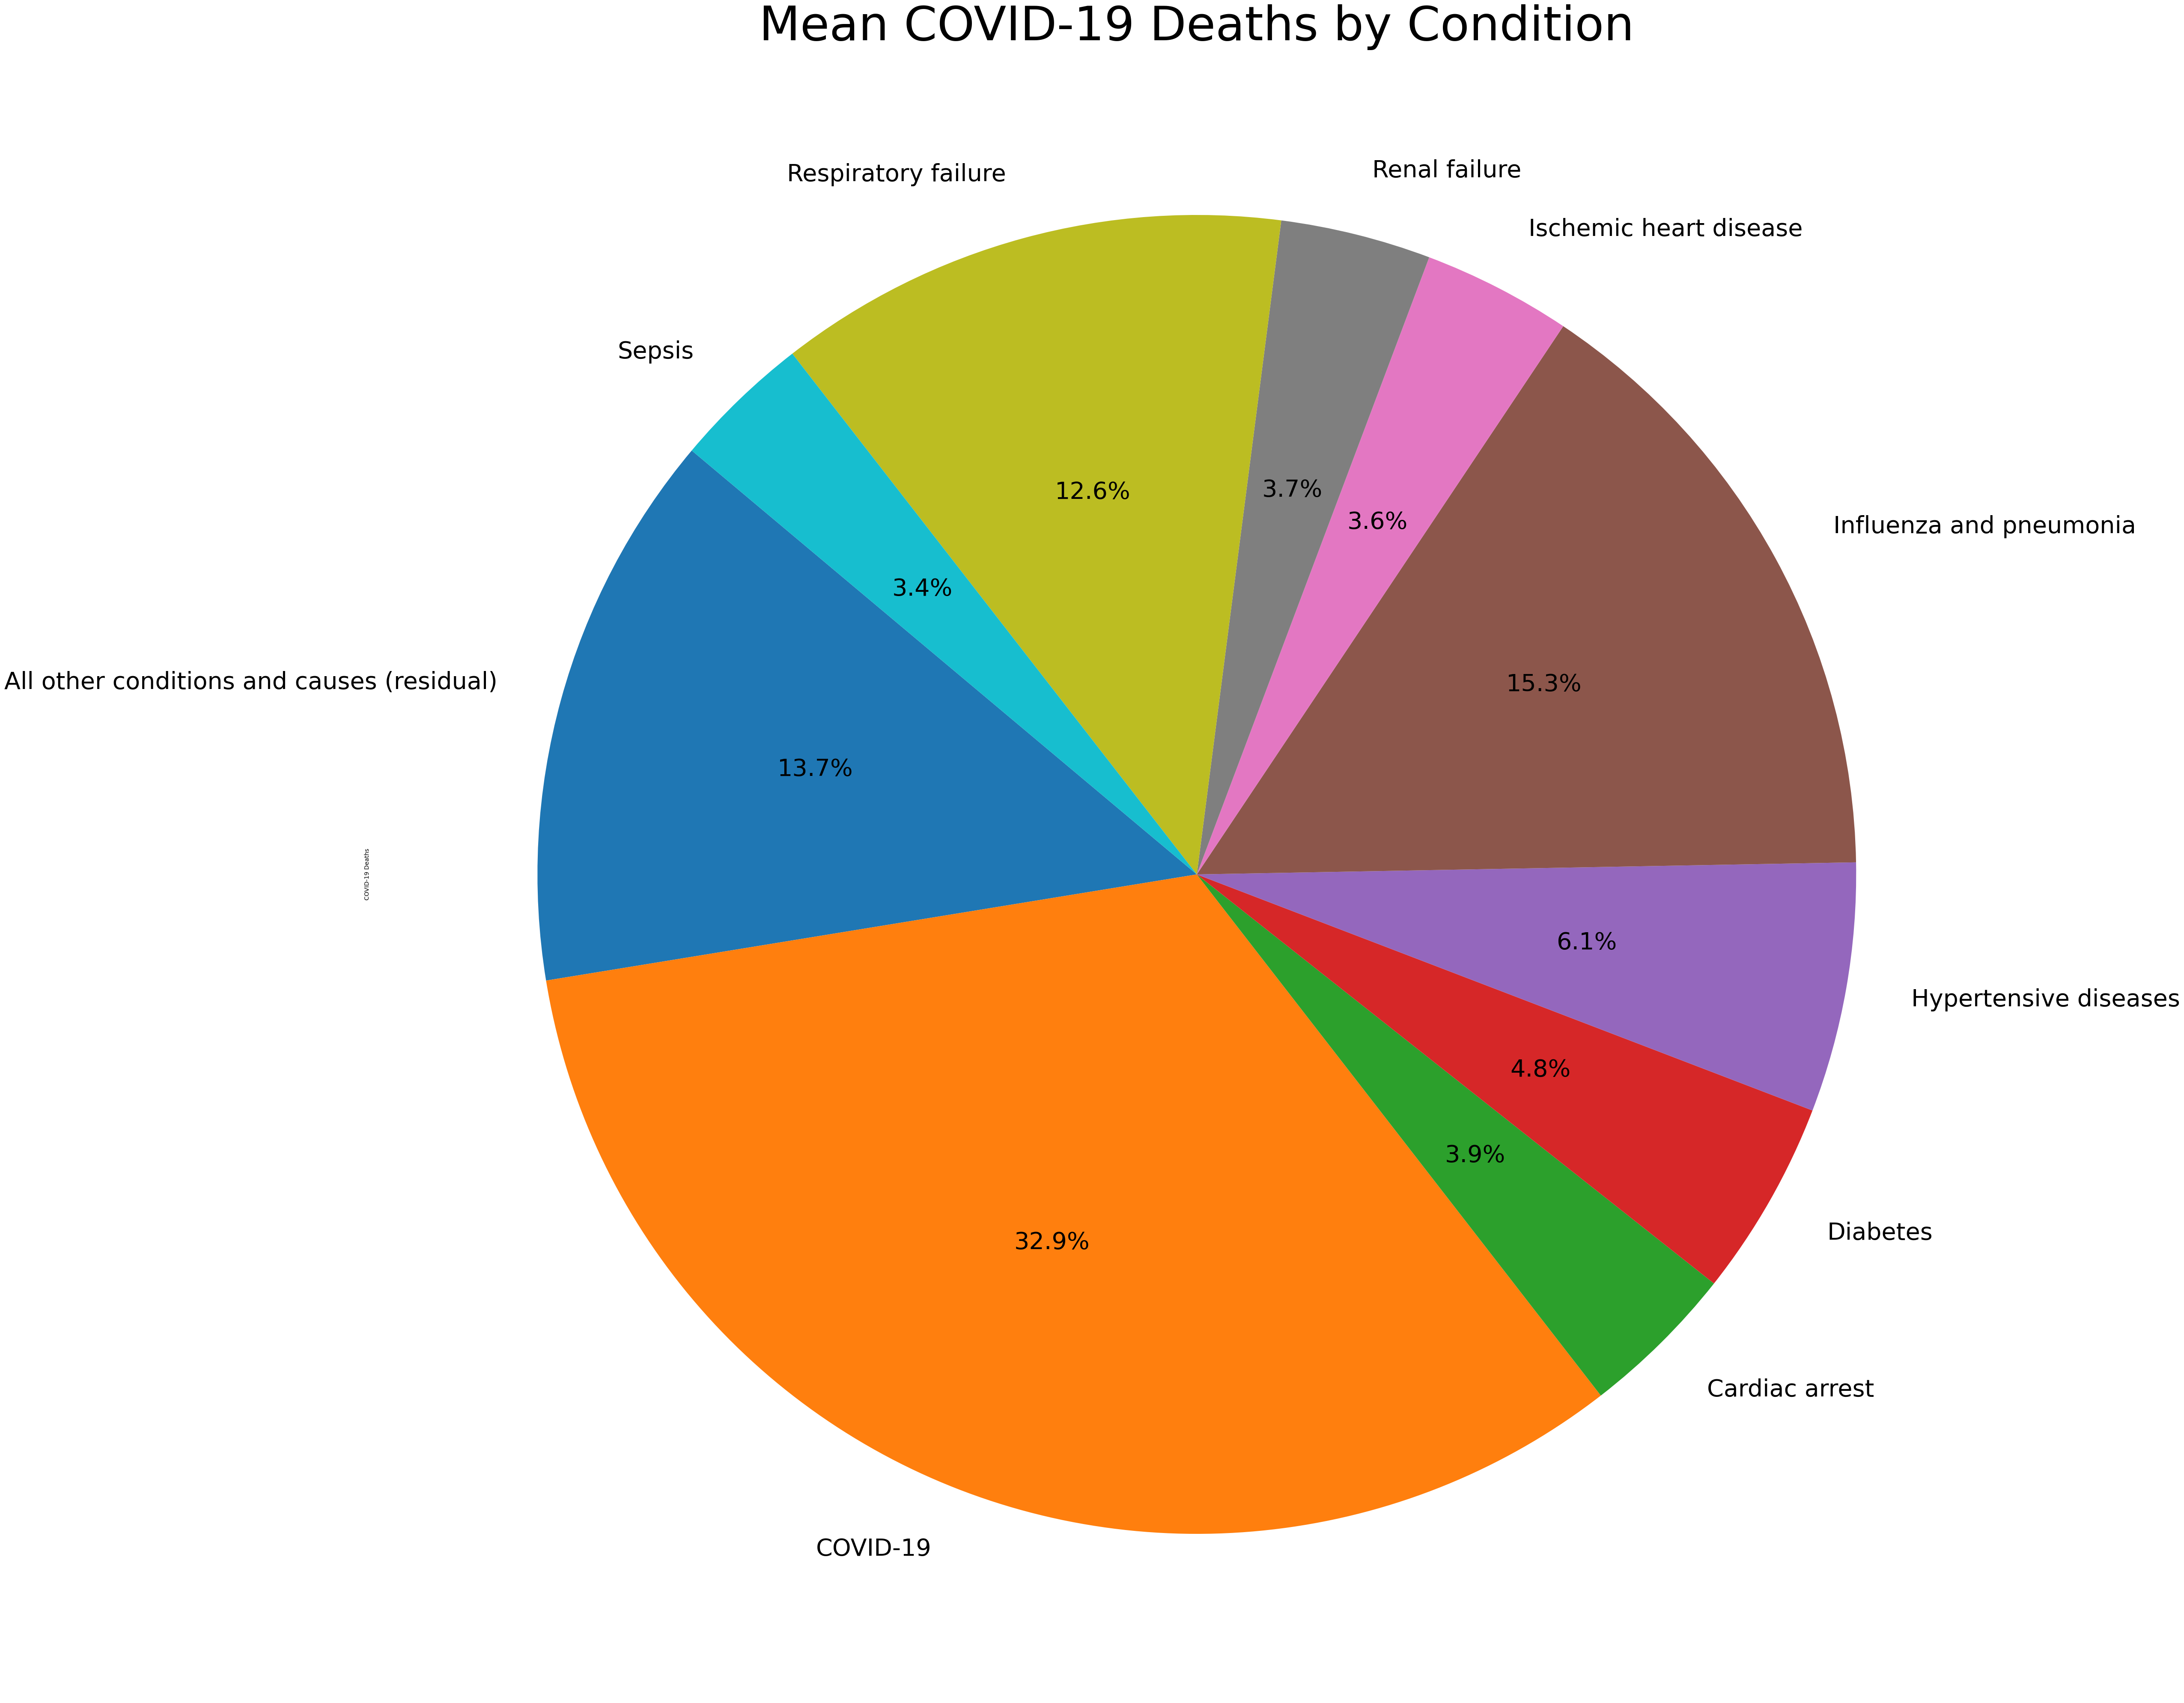

In [65]:
plt.figure(figsize=(50, 50))
top_10.groupby("Condition")["COVID-19 Deaths"].mean().plot(kind = "pie",autopct="%1.1f%%", startangle=140, textprops={"fontsize":40})
plt.title("Mean COVID-19 Deaths by Condition", fontsize=80)
plt.show()

In [68]:
highest_value = top_10["COVID-19 Deaths"].max()

2275679

In [88]:
top_10_minusone = top_10[top_10["COVID-19 Deaths"] < highest_value]
print(top_10_minusone)

                                            COVID-19 Deaths
Condition                                                  
Influenza and pneumonia                             1059580
All other conditions and causes (residual)           945906
Respiratory failure                                  867913
Hypertensive diseases                                422941
Diabetes                                             333397
Cardiac arrest                                       266310
Renal failure                                        254943
Ischemic heart disease                               252011
Sepsis                                               233425


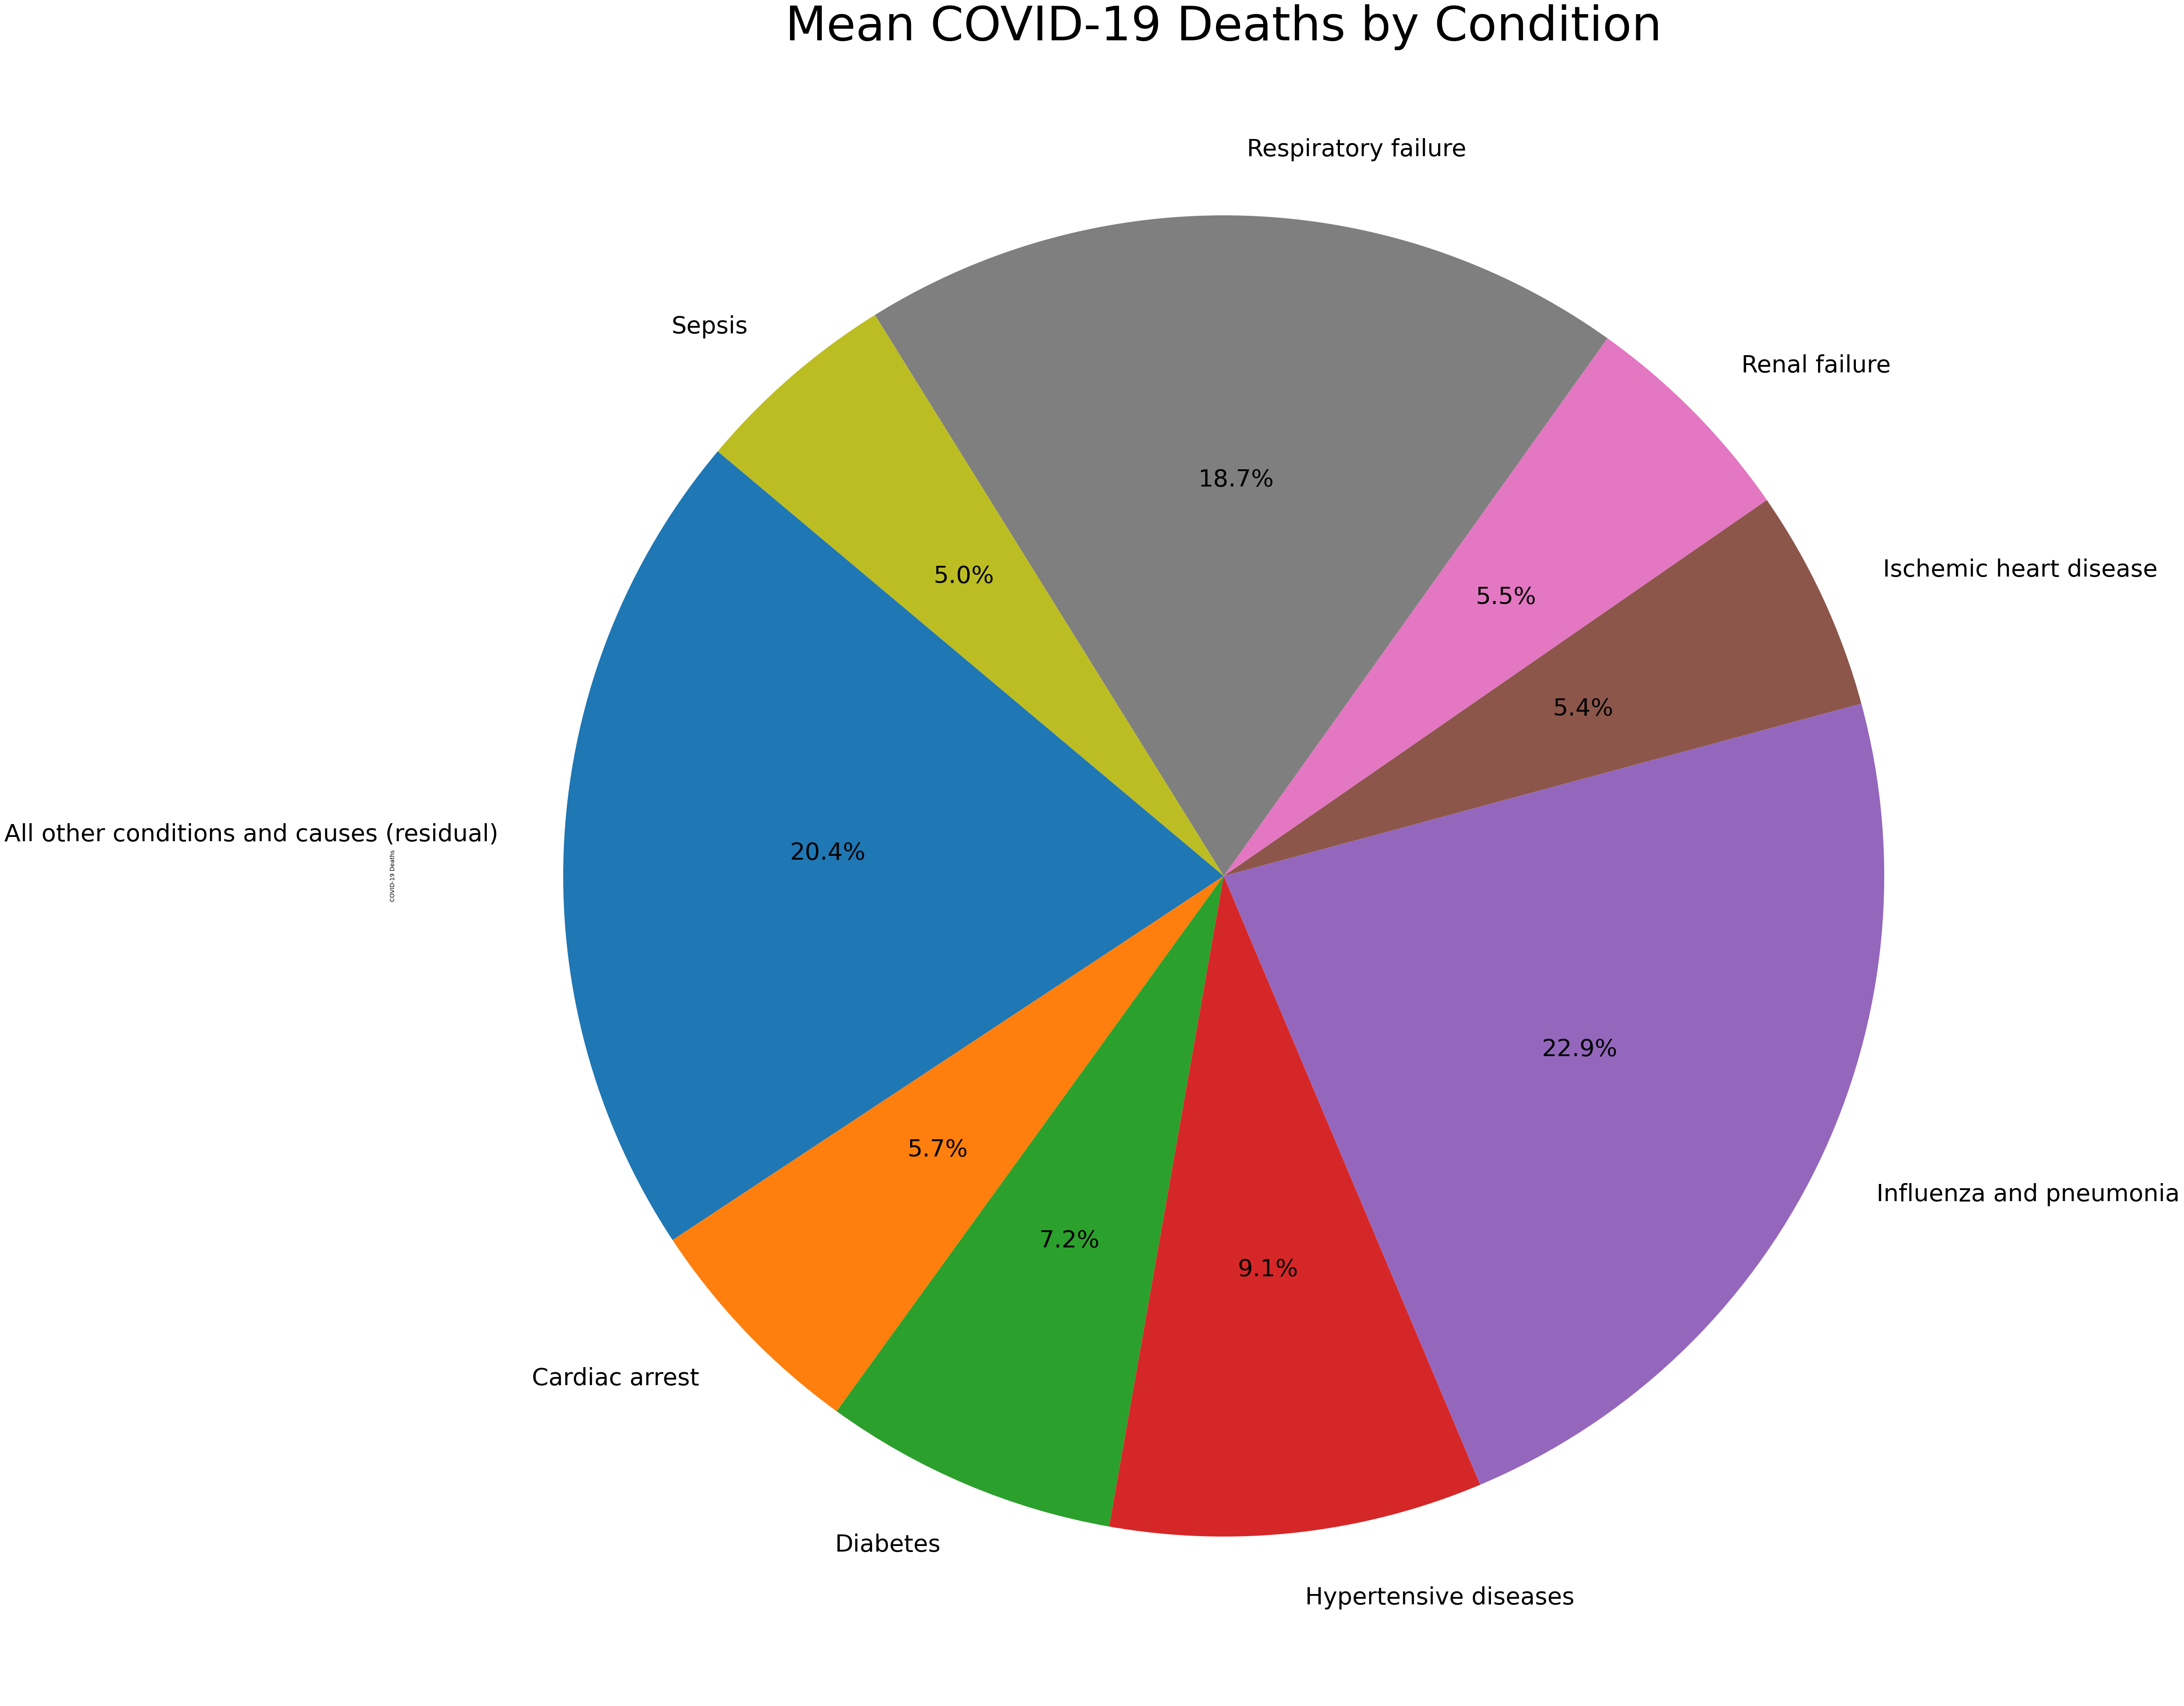

In [71]:
plt.figure(figsize=(50, 50))
top_10_minusone.groupby("Condition")["COVID-19 Deaths"].mean().plot(kind = "pie",autopct="%1.1f%%", startangle=140, textprops={"fontsize":40})
plt.title("Mean COVID-19 Deaths by Condition", fontsize=80)
plt.show()

In [96]:
Top2 = jjj2[jjj2["COVID-19 Deaths"] < highest_value] #not used. just save in case.
print(jjj2)

                                                    COVID-19 Deaths
Condition                                                          
Adult respiratory distress syndrome                          209847
All other conditions and causes (residual)                   945906
Alzheimer disease                                             65941
COVID-19                                                    2275679
Cardiac arrest                                               266310
Cardiac arrhythmia                                           182204
Cerebrovascular diseases                                     118298
Chronic lower respiratory diseases                           214887
Diabetes                                                     333397
Heart failure                                                190624
Hypertensive diseases                                        422941
Influenza and pneumonia                                     1059580
Intentional and unintentional injury, poisoning.

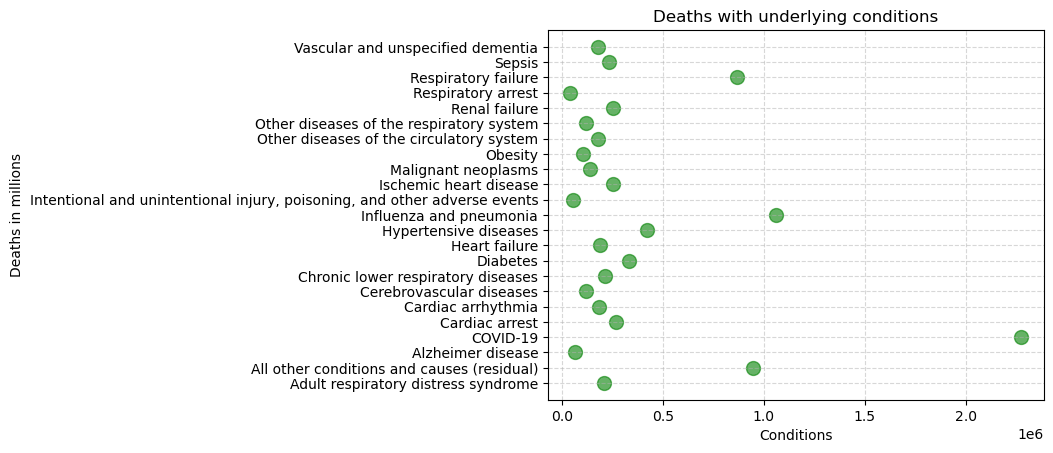

In [118]:
plt.scatter(jjj2,
            jjj2.index,
            s=100, #marker sizeA
            c='green', #marker color
            marker='o', #marker style
            alpha=0.6, #marker transparency
            label='Data Points' #label for legend
           )
plt.xlabel("Conditions", fontsize=10)
plt.ylabel("Deaths in millions", fontsize=10)
plt.title("Deaths with underlying conditions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation='horizontal')
plt.show()

In [128]:
highest_index = jjj2["COVID-19 Deaths"].idxmax()

In [129]:
highest_index

'COVID-19'

In [131]:
jjj2_without_highest = jjj2.drop(highest_index)

In [137]:
num_points = len(jjj2_without_highest["COVID-19 Deaths"])
colors = np.random.rand(num_points)
sizes = (30 * np.random.rand(num_points))**2

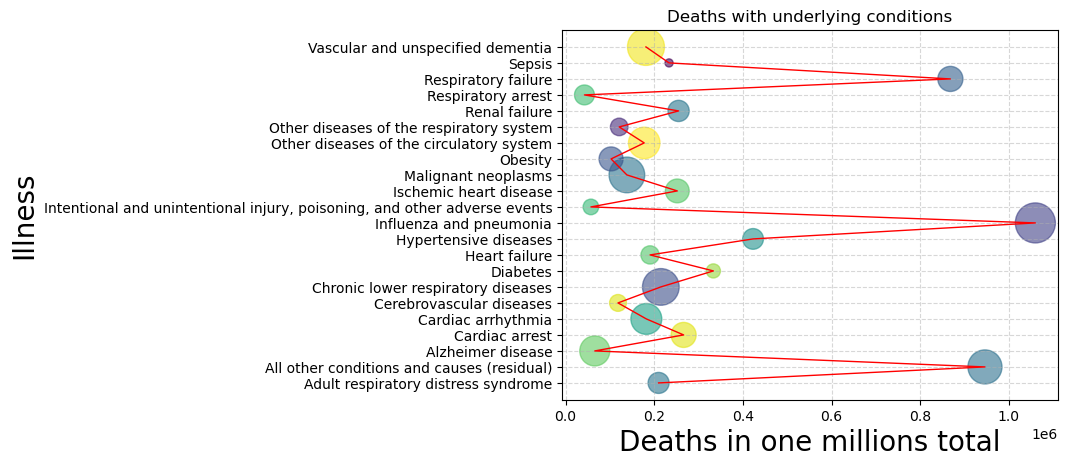

In [151]:
plt.scatter(jjj2_without_highest["COVID-19 Deaths"],
            jjj2_without_highest.index,
            s=sizes, #100, #marker sizeA
            c=colors, #marker color
            #marker='o', #marker style
            alpha=0.6, #marker transparency
            label='Data Points' #label for legend
           )
plt.xlabel("Deaths in one millions total", fontsize=20)
plt.ylabel("Illness", fontsize=20)
plt.title("Deaths with underlying conditions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation='horizontal')
plt.plot(jjj2_without_highest["COVID-19 Deaths"], jjj2_without_highest.index, color='red', linestyle='-', linewidth=1, label='Straight Line')
plt.savefig("scatterplot1.png")
plt.show()

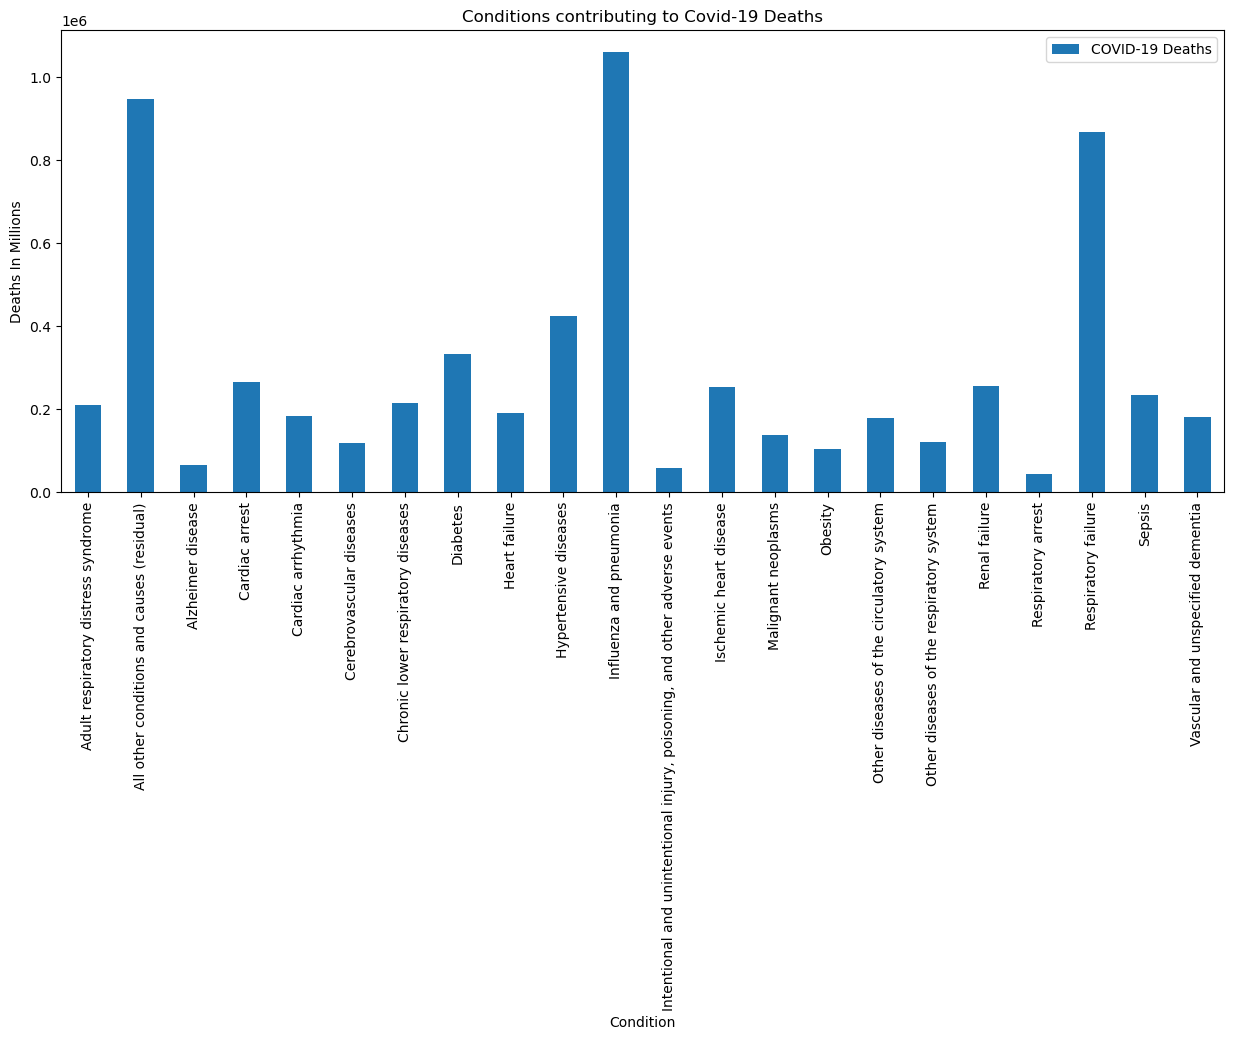

In [150]:
jjj2_without_highest.plot(kind = "bar", figsize = (15, 6), title = "Conditions contributing to Covid-19 Deaths")
plt.ylabel("Deaths In Millions")
plt.savefig("bluebar2.png")
plt.show()